# **Data Wrangling**

- EDA
- Determining Training Labels

In [1]:
import pandas as pd
import numpy as np


In [4]:
#here we r using  the file we have prepared
df = pd.read_csv('/content/dataset1.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857


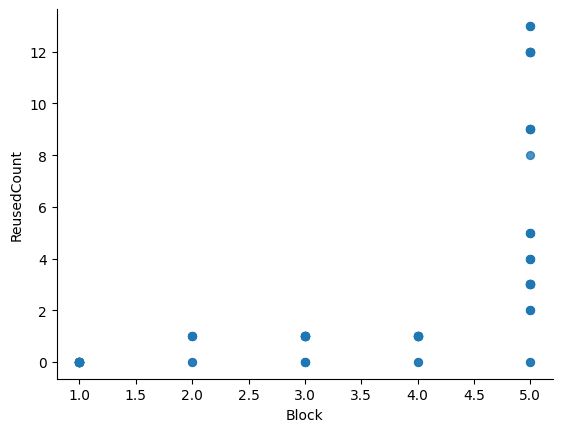

In [17]:


from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Block', y='ReusedCount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

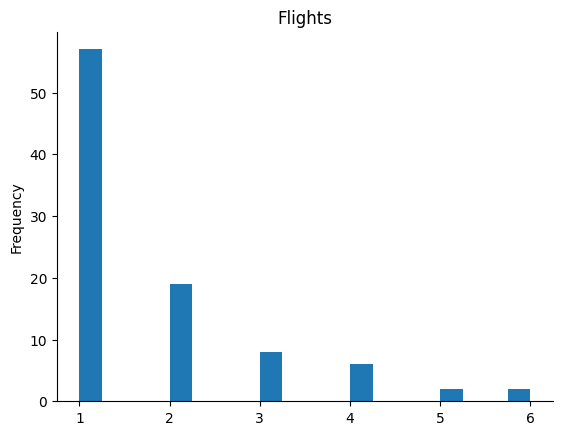

In [14]:


from matplotlib import pyplot as plt
df['Flights'].plot(kind='hist', bins=20, title='Flights')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
# prompt: Using dataframe df: bar graph

import altair as alt
chart = alt.Chart(df).mark_bar().encode(
    x='Flights:N',
    y='Outcome',
    color='Outcome'
).properties(width=600)
chart


alt.Chart(...)

In [16]:
# prompt: Using dataframe df: bar graph

import altair as alt
chart = alt.Chart(df).mark_bar().encode(
    x='Flights:N',
    y='Outcome',
    color='Outcome'
).properties(width=600)
chart


alt.Chart(...)

In [18]:
#identifying percentage of missing value
df.isnull().sum()/len(df)*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        6.382979
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        31.914894
Block              4.255319
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [19]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [20]:
df['LaunchSite'].value_counts()

LaunchSite
CCSFS SLC 40       55
KSC LC 39A         22
VAFB SLC 4E        13
Kwajalein Atoll     4
Name: count, dtype: int64

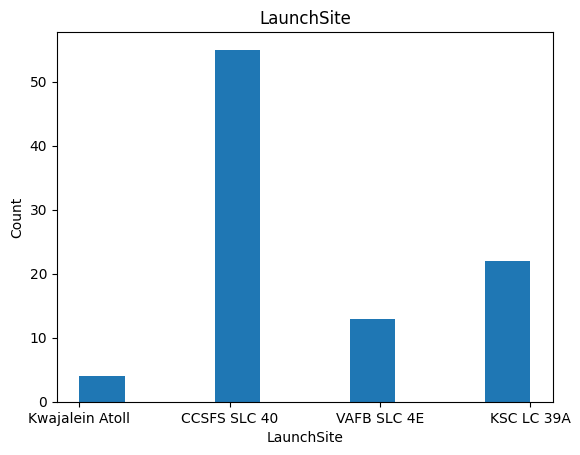

In [25]:
plt.hist(df['LaunchSite'])
plt.title('LaunchSite')
plt.xlabel('LaunchSite')
plt.ylabel('Count')
plt.show()

In [21]:
df['Orbit'].value_counts()

Orbit
GTO      27
ISS      21
VLEO     14
LEO      11
PO        9
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

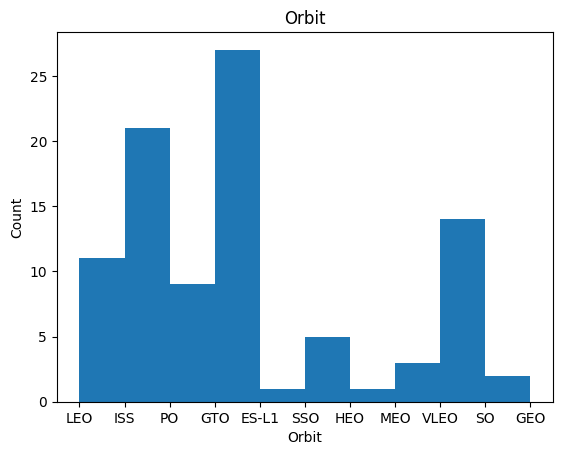

In [24]:
plt.hist(df['Orbit'])
plt.title('Orbit')
plt.xlabel('Orbit')
plt.ylabel('Count')
plt.show()

In [49]:
landing_outcomes=df['Outcome'].value_counts()
landing_outcomes

Outcome
True ASDS      41
None None      23
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

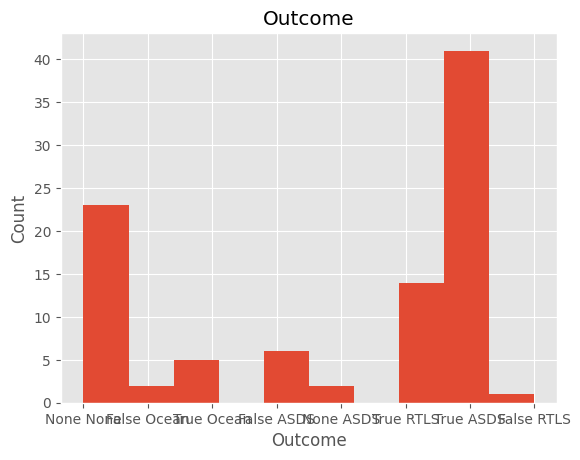

In [39]:
plt.hist(df['Outcome'])
plt.title('Outcome')
plt.xlabel('Outcome')
plt.style.use('ggplot')
plt.ylabel('Count')
plt.autoscale(tight=False)
plt.show()

<code>True Ocean</code> means the mission outcome was successfully  landed to a specific region of the ocean while <code>False Ocean</code> means the mission outcome was unsuccessfully landed to a specific region of the ocean. <code>True RTLS</code> means the mission outcome was successfully  landed to a ground pad <code>False RTLS</code> means the mission outcome was unsuccessfully landed to a ground pad.<code>True ASDS</code> means the mission outcome was successfully  landed to a drone ship <code>False ASDS</code> means the mission outcome was unsuccessfully landed to a drone ship. <code>None ASDS</code> and <code>None None</code> these represent a failure to land.


In [40]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


We create a set of outcomes where the second stage did not land successfully:


In [41]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [42]:
# landing_class = 0 if bad_outcome
# landing_class = 1 otherwise
landing_class = []
for outcome in df['Outcome']:
    if outcome in bad_outcomes:
        landing_class.append(0)
    else:
        landing_class.append(1)

In [43]:
df['Class']=landing_class
df[['Class']].head(8)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0


In [44]:
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin1A,167.743129,9.047721,0
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin2A,167.743129,9.047721,0
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin2C,167.743129,9.047721,0
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin3C,167.743129,9.047721,0
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0


In [45]:
df['Class'].mean()

0.6382978723404256

In [46]:
df.to_csv("dataset_part_2.csv", index=False)


In [48]:
from google.colab import files
files.download('dataset_part_2.csv')
print("Downloaded")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded
